In [1]:
import pandas as pd, matplotlib.pyplot as plt,seaborn as sns

In [44]:
data=pd.read_csv("netflix_titles.csv")
data.set_index('show_id', inplace=True)
data.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [45]:
data.columns #Columns that are present in dataset

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<Axes: >

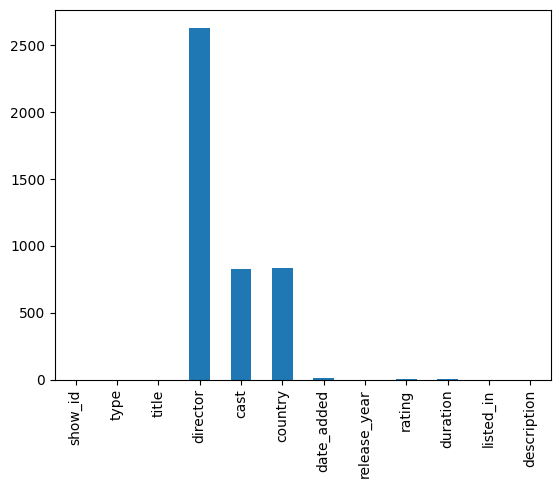

In [7]:
#Null columns in dataset
data.isna().sum().plot(kind='bar')

In [6]:
#Checking the data shape
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns')

The dataset contains 8807 rows and 12 columns


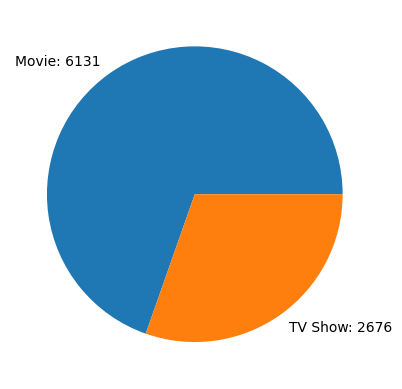

In [12]:
column=data['type']
value_counts = column.value_counts()
labels = [f'{index}: {value_counts[index]}' for index in value_counts.index]
plt.pie(column.value_counts(),labels=labels)
plt.show()

In [14]:
# Checking the null values in the dataset
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
netflix=data.dropna()
# After removing missing values, check the data shape
print(f'The dataset contains {netflix.shape[0]} rows and {netflix.shape[1]} columns')

The dataset contains 5332 rows and 12 columns


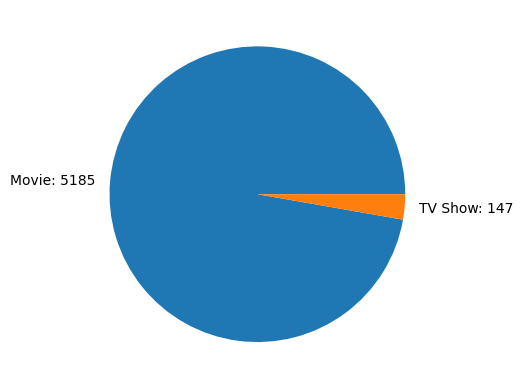

In [16]:
column=netflix['type']
#labels=['Movie','TV-Show']
value_counts = column.value_counts()
labels = [f'{index}: {value_counts[index]}' for index in value_counts.index]
plt.pie(column.value_counts(),labels=labels)
plt.show()

In [18]:
# Checking the null values in the dataset
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<ipython-input-20-51844f2e425f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['genres'] = tv_show['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)


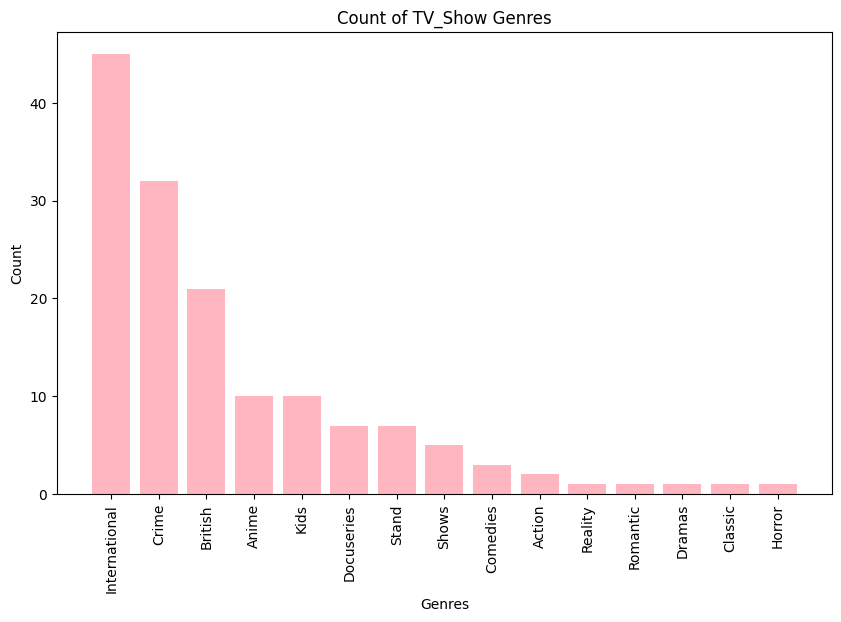

In [20]:
tv_show = netflix[netflix['type'] == 'TV Show']

# Extract genres from the 'listed_in' column
tv_show['genres'] = tv_show['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Count the occurrences of each genre
genre_counts_tv_show = tv_show['genres'].value_counts().reset_index()

# Rename the columns to 'genre' and 'count'
genre_counts_tv_show.columns = ['genre', 'count']

# Create a bar plot of genre counts
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_tv_show['genre'], genre_counts_tv_show['count'], color='lightpink')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of TV_Show Genres')
plt.xticks(rotation=90)
plt.show()

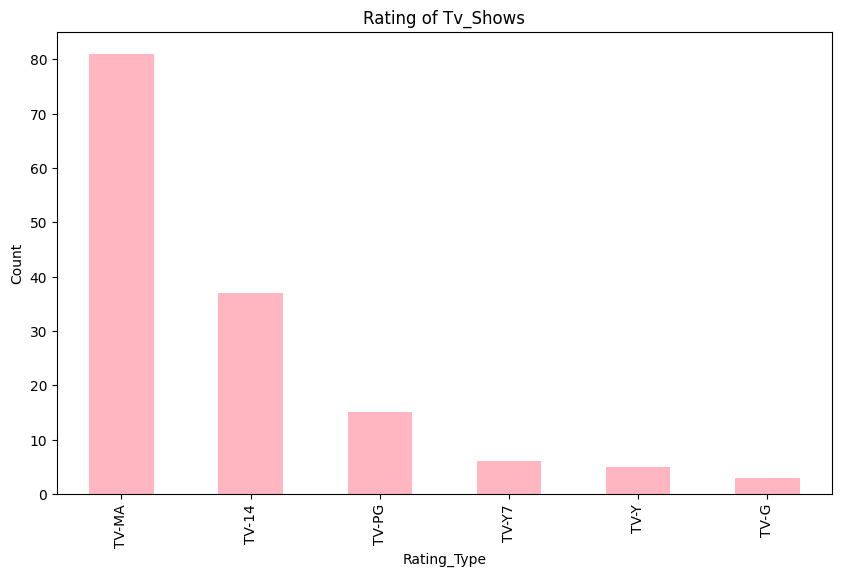

In [57]:
# Plot a pie chart to visualize the distribution of tv_show ratings
tv_show['rating'].value_counts().plot(kind="bar",color='lightpink',figsize=(10, 6))
plt.xlabel('Rating_Type')
plt.ylabel('Count')
plt.title('Rating of Tv_Shows')
# Display the pie chart
plt.show()

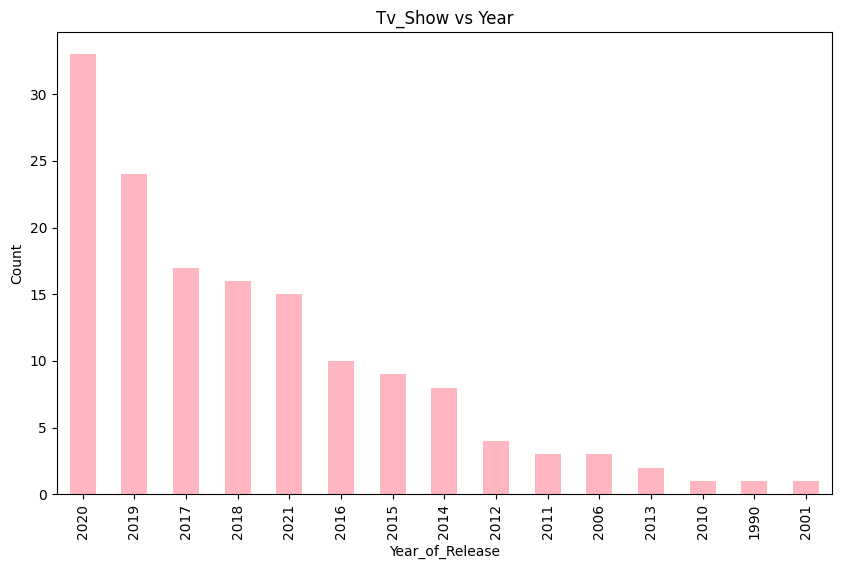

In [55]:
# Plot a pie chart to visualize the distribution of movie ratings
tv_show['release_year'].value_counts().plot.bar(figsize=(10, 6),color='lightpink')
# Display the pie chart
plt.xlabel('Year_of_Release')
plt.ylabel('Count')
plt.title('Tv_Show vs Year')
plt.show()

<ipython-input-59-b1c6f57e8a05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['date_added'] = pd.to_datetime(tv_show['date_added'])
<ipython-input-59-b1c6f57e8a05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['year'] = tv_show['date_added'].dt.year


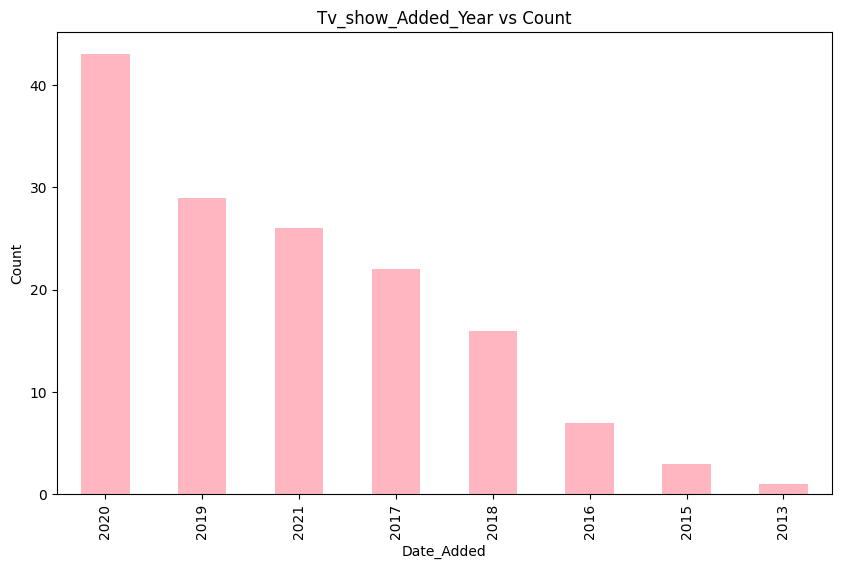

In [59]:
tv_show['date_added'] = pd.to_datetime(tv_show['date_added'])
# Extract the year from the datetime column
tv_show['year'] = tv_show['date_added'].dt.year

tv_show['year'].value_counts().plot.bar(figsize=(10, 6),color='lightpink')
plt.xlabel('Date_Added')
plt.ylabel('Count')
plt.title('Tv_show_Added_Year vs Count')
plt.show()

<ipython-input-19-baa13db5b904>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)


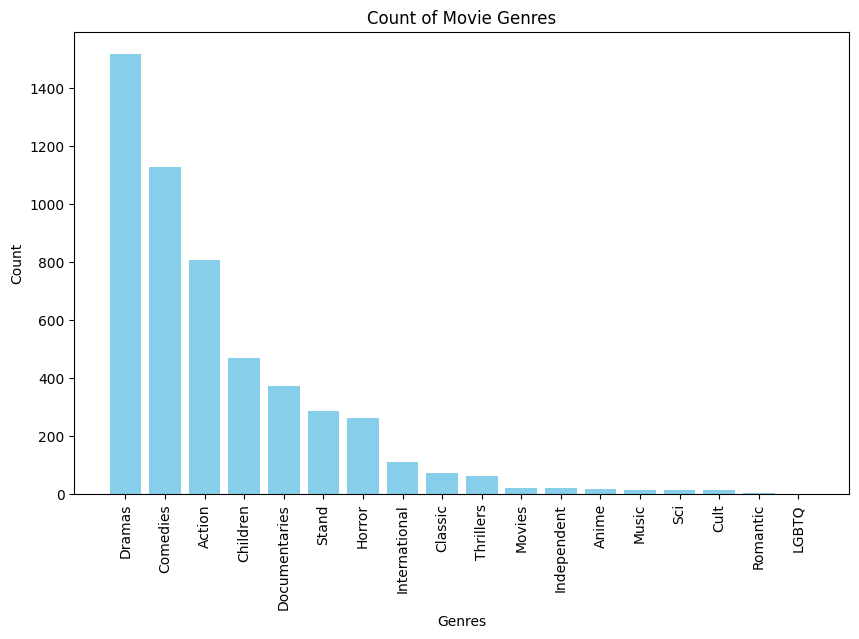

In [19]:
movie = netflix[netflix['type'] == 'Movie']

# Extract genres from the 'listed_in' column
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Count the occurrences of each genre
genre_counts_movie = movie['genres'].value_counts().reset_index()

# Rename the columns to 'genre' and 'count'
genre_counts_movie.columns = ['genre', 'count']

# Create a bar plot of genre counts
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
plt.show()

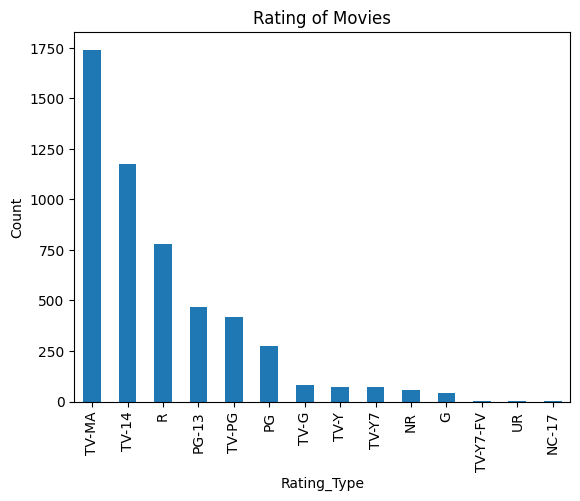

In [39]:
# Plot a pie chart to visualize the distribution of movie ratings
movie['rating'].value_counts().plot(kind="bar")
plt.xlabel('Rating_Type')
plt.ylabel('Count')
plt.title('Rating of Movies')
# Display the pie chart
plt.show()

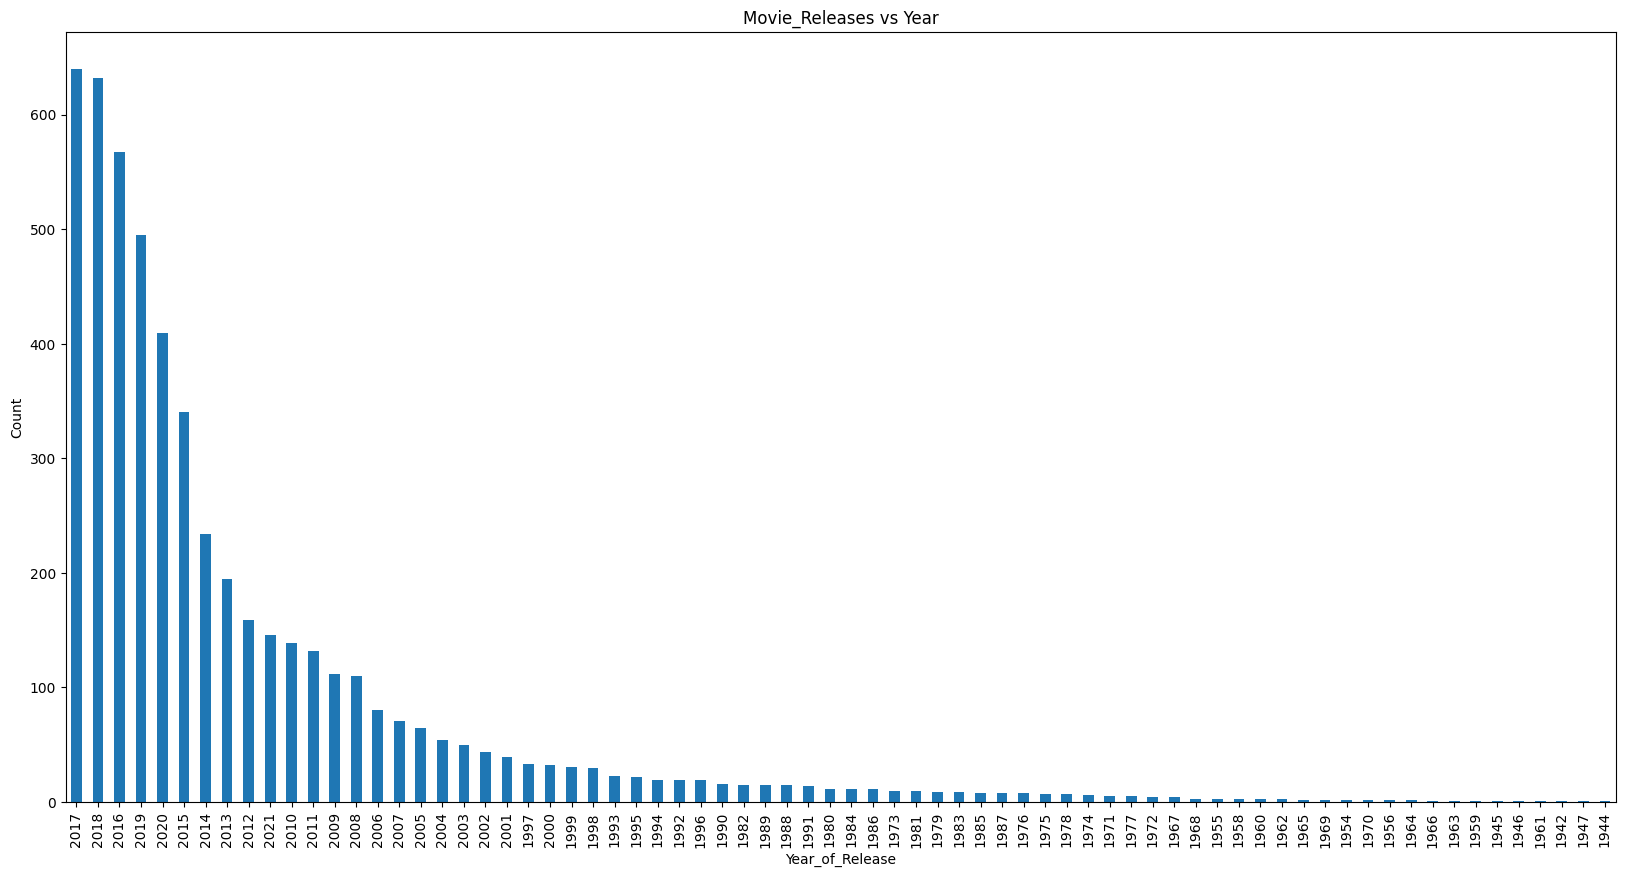

In [40]:
# Plot a pie chart to visualize the distribution of movie ratings
movie['release_year'].value_counts().plot.bar(figsize=(20, 10))
# Display the pie chart
plt.xlabel('Year_of_Release')
plt.ylabel('Count')
plt.title('Movie_Releases vs Year')
plt.show()

<ipython-input-49-4588dda55d38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['date_added'] = pd.to_datetime(movie['date_added'])
<ipython-input-49-4588dda55d38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['year'] = movie['date_added'].dt.year


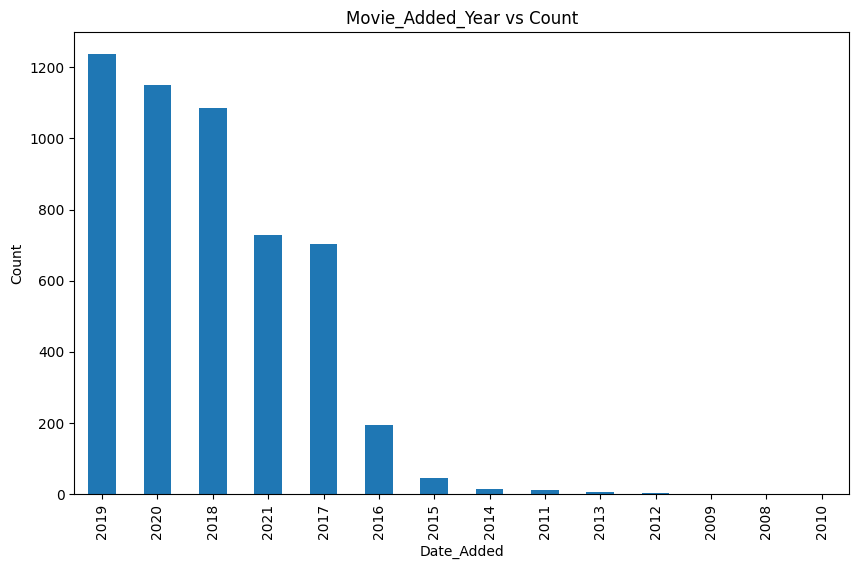

In [49]:
# Plot a pie chart to visualize the distribution of movie ratings
movie['date_added'] = pd.to_datetime(movie['date_added'])
# Extract the year from the datetime column
movie['year'] = movie['date_added'].dt.year

movie['year'].value_counts().plot.bar(figsize=(10, 6))
# Display the pie chart
plt.xlabel('Date_Added')
plt.ylabel('Count')
plt.title('Movie_Added_Year vs Count')
plt.show()